In [ ]:
!wget http://cs231n.stanford.edu/tiny-imagenet-200.zip
!unzip -q tiny-imagenet-200.zip

--2021-12-03 05:55:33--  http://cs231n.stanford.edu/tiny-imagenet-200.zip
Resolving cs231n.stanford.edu (cs231n.stanford.edu)... 171.64.68.10
Connecting to cs231n.stanford.edu (cs231n.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248100043 (237M) [application/zip]
Saving to: ‘tiny-imagenet-200.zip’

tiny-imagenet-200.z 100%[===================>] 236.61M  6.21MB/s    in 40s     

2021-12-03 05:56:14 (5.86 MB/s) - ‘tiny-imagenet-200.zip’ saved [248100043/248100043]



In [ ]:
import time
import copy

In [ ]:
import os
# if not os.path.exists("tiny-imagenet-200/"):
#     !wget http: // cs231n.stanford.edu/tiny-imagenet-200.zip
#     !unzip - q tiny-imagenet-200.zip
#     print("Data downloaded!")
# else:
#     print("Data downloaded!")


import torch
import torchvision
import torch.nn as nn

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import PIL

import os
import random

# from utils import helper_plot

if torch.cuda.is_available():
    # you can continue going on here, like cuda:1 cuda:2....etc.
    device = torch.device("cuda:0")
    print("Running on the GPU")
else:
    device = torch.device("cpu")
    print("Running on the CPU")

# Constants
DATA_DIR = "tiny-imagenet-200"
VAL_DIR = "tiny-imagenet-200/val"
VAL_IMG_DIR = "tiny-imagenet-200/val/images"

train_transforms = torchvision.transforms.Compose([
    torchvision.transforms.RandomRotation(30),
    torchvision.transforms.Resize(255),
    torchvision.transforms.RandomResizedCrop(224),
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.RandomVerticalFlip(),
    torchvision.transforms.ToTensor()
])

test_transforms = torchvision.transforms.Compose([
    torchvision.transforms.Resize(255),
    torchvision.transforms.CenterCrop(224),
    torchvision.transforms.ToTensor()
])

train_dataset = torchvision.datasets.ImageFolder(
    "tiny-imagenet-200/train", transform=train_transforms)
train_dataloader = torch.utils.data.DataLoader(
    train_dataset, batch_size=128, shuffle=True, drop_last=True)
# helper_plot.plot_grid(dataloader=train_dataloader)

# Place corresponding images into respective folders
val_info = pd.read_csv("tiny-imagenet-200/val/val_annotations.txt",
                       sep='\t', header=None, names=["File", "Class", "X", "Y", "H", "W"])
val_info.drop(["X", "Y", "H", "W"], axis=1, inplace=True)
for img, folder_name in zip(val_info["File"], val_info["Class"]):
    newpath = os.path.join(VAL_IMG_DIR, folder_name)
    if not os.path.exists(newpath):
        os.makedirs(newpath)
    if os.path.exists(os.path.join(VAL_IMG_DIR, img)):
        os.rename(os.path.join(VAL_IMG_DIR, img), os.path.join(newpath, img))

val_dataset = torchvision.datasets.ImageFolder(
    "tiny-imagenet-200/val/images", transform=test_transforms)
val_dataloader = torch.utils.data.DataLoader(
    val_dataset, batch_size=32, shuffle=True, drop_last=True)
# helper_plot.plot_grid(dataloader=val_dataloader)


# class AlexNet(nn.Module):
#     def __init__(self, num_classes: int = 200, dropout: float = 0.5) -> None:
#         super().__init__()
#         self.features = nn.Sequential(
#             nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2),
#             nn.ReLU(inplace=True),
#             nn.MaxPool2d(kernel_size=2),
#             nn.Conv2d(64, 192, kernel_size=5, padding=2),
#             nn.ReLU(inplace=True),
#             nn.MaxPool2d(kernel_size=3, stride=2),
#             nn.Conv2d(192, 384, kernel_size=3, padding=1),
#             nn.ReLU(inplace=True),
#             nn.Conv2d(384, 256, kernel_size=3, padding=1),
#             nn.ReLU(inplace=True),
#             nn.Conv2d(256, 256, kernel_size=3, padding=1),
#             nn.ReLU(inplace=True),
#             nn.MaxPool2d(kernel_size=3, stride=2),
#         )
#         self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
#         self.classifier = nn.Sequential(
#             nn.Dropout(p=dropout),
#             nn.Linear(256 * 6 * 6, 4096),
#             nn.ReLU(inplace=True),
#             nn.Dropout(p=dropout),
#             nn.Linear(4096, 4096),
#             nn.ReLU(inplace=True),
#             nn.Linear(4096, num_classes),
#         )

#     def forward(self, x: torch.Tensor) -> torch.Tensor:
#         x = self.features(x)
#         x = self.avgpool(x)
#         x = torch.flatten(x, 1)
#         x = self.classifier(x)
#         return x


# model = AlexNet(num_classes=200).to(device)

# criterion = nn.CrossEntropyLoss()
# optimiser = torch.optim.SGD(model.parameters(), lr=0.5)
# scheduler = torch.optim.lr_scheduler.StepLR(
#     optimizer=optimiser, step_size=5, gamma=0.99)

# # from utils import misc

# # for idx, (image, label) in enumerate(train_dataloader):
# #     print(idx, image.shape, label.shape)
# #     break

# epochs = 2
# train_loss = 0
# train_correct = 0
# total = 0


# for i in range(epochs):
#     for index, (images, labels) in enumerate(train_dataloader):
#         images, labels = images.to(device), labels.to(device)
#         outputs = model.forward(images)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimiser.step()

#         train_loss += loss.item()

#         print(torch.sum(torch.argmax(outputs, 1) == labels))

        

#         total += labels.size(0)

#         # misc.progress_bar(index, len(train_dataloader), 'Loss: %.4f | Acc: %.3f%% (%d/%d)'
#         #                  % (train_loss / (index + 1), 100. * train_correct / total, train_correct, total))

#         optimiser.zero_grad()
#         scheduler.step()
#         curr_lr = scheduler.get_last_lr()

#         print(
#             f'Epoch: [{i+1} / {epochs}], Step [{index + 1} / {len(train_dataloader)}], Loss: {loss.item()}, lr: {curr_lr[0]}')


# print(train_loss, train_correct / total)


Running on the GPU


In [ ]:
# torch.save(model.state_dict(), "model.pt")

In [ ]:
# model.features[0].weight.data.shape

In [ ]:
def plot_filters_single_channel_big(t):
    
    #setting the rows and columns
    nrows = t.shape[0]*t.shape[2]
    ncols = t.shape[1]*t.shape[3]
    
    
    npimg = np.array(t.numpy(), np.float32)
    npimg = npimg.transpose((0, 2, 1, 3))
    npimg = npimg.ravel().reshape(nrows, ncols)
    
    npimg = npimg.T
    
    fig, ax = plt.subplots(figsize=(ncols/10, nrows/200))    
    imgplot = sns.heatmap(npimg, xticklabels=False, yticklabels=False, cmap='gray', ax=ax, cbar=False)

def plot_filters_multi_channel(t):
    
    #get the number of kernals
    num_kernels = t.shape[0]    
    
    #define number of columns for subplots
    num_cols = 12
    #rows = num of kernels
    num_rows = num_kernels
    
    #set the figure size
    fig = plt.figure(figsize=(num_cols,num_rows))
    
    #looping through all the kernels
    for i in range(t.shape[0]):
        ax1 = fig.add_subplot(num_rows,num_cols,i+1)
        
        #for each kernel, we convert the tensor to numpy 
        npimg = np.array(t[i].numpy(), np.float32)
        #standardize the numpy image
        npimg = (npimg - np.mean(npimg)) / np.std(npimg)
        npimg = np.minimum(1, np.maximum(0, (npimg + 0.5)))
        npimg = npimg.transpose((1, 2, 0))
        ax1.imshow(npimg)
        ax1.axis('off')
        ax1.set_title(str(i))
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        
    plt.savefig('myimage.png', dpi=100)    
    plt.tight_layout()
    plt.show()


def plot_filters_single_channel(t):
    
    #kernels depth * number of kernels
    nplots = t.shape[0]*t.shape[1]
    ncols = 12
    
    nrows = 1 + nplots//ncols
    #convert tensor to numpy image
    npimg = np.array(t.numpy(), np.float32)
    
    count = 0
    fig = plt.figure(figsize=(ncols, nrows))
    
    #looping through all the kernels in each channel
    for i in range(t.shape[0]):
        for j in range(t.shape[1]):
            count += 1
            ax1 = fig.add_subplot(nrows, ncols, count)
            npimg = np.array(t[i, j].numpy(), np.float32)
            npimg = (npimg - np.mean(npimg)) / np.std(npimg)
            npimg = np.minimum(1, np.maximum(0, (npimg + 0.5)))
            ax1.imshow(npimg)
            ax1.set_title(str(i) + ',' + str(j))
            ax1.axis('off')
            ax1.set_xticklabels([])
            ax1.set_yticklabels([])
   
    plt.tight_layout()
    plt.show()

def plot_weights(model, layer_num, single_channel = True, collated = False):
  
  #extracting the model features at the particular layer number
  layer = model.features[layer_num]
  
  #checking whether the layer is convolution layer or not 
  if isinstance(layer, nn.Conv2d):
    #getting the weight tensor data
    weight_tensor = model.features[layer_num].weight.data
    
    if single_channel:
      if collated:
        plot_filters_single_channel_big(weight_tensor)
      else:
        plot_filters_single_channel(weight_tensor)
        
    else:
      if weight_tensor.shape[1] == 3:
        plot_filters_multi_channel(weight_tensor)
      else:
        print("Can only plot weights with three channels with single channel = False")
        
  else:
    print("Can only visualize layers which are convolutional")

In [ ]:
# plot_weights(alexnet.cpu(), 0, single_channel=False)
# print("Plot")

In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0


    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for index, (inputs, labels) in enumerate(dataloader[phase]):
                inputs = inputs.to(device)
                labels = labels.to(device)
                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

                print(f"[{index} / {len(train_dataloader)}], Loss: {loss}")
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / len(dataloader[phase])
            epoch_acc = running_corrects.double() / len(dataloader[phase])

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [ ]:
dataloader = {}
dataloader['train'] = train_dataloader
dataloader['val'] = val_dataloader

In [ ]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(val_dataloader):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title('predicted: {}'.format(class_names[preds[j]]))
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

In [ ]:
model_ft = torchvision.models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, 200)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = torch.optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [ ]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=3)

Epoch 0/2
----------
[0 / 781], Loss: 5.548508644104004
[1 / 781], Loss: 5.511419296264648
[2 / 781], Loss: 5.561408519744873
[3 / 781], Loss: 5.436439037322998
[4 / 781], Loss: 5.4931182861328125
[5 / 781], Loss: 5.518818378448486
[6 / 781], Loss: 5.521348476409912
[7 / 781], Loss: 5.558944225311279
[8 / 781], Loss: 5.531897068023682
[9 / 781], Loss: 5.460701942443848
[10 / 781], Loss: 5.471998691558838
[11 / 781], Loss: 5.569391250610352
[12 / 781], Loss: 5.5899763107299805
[13 / 781], Loss: 5.554075717926025
[14 / 781], Loss: 5.370026588439941
[15 / 781], Loss: 5.495981693267822
[16 / 781], Loss: 5.389349937438965
[17 / 781], Loss: 5.458691120147705
[18 / 781], Loss: 5.324427127838135
[19 / 781], Loss: 5.476112365722656
[20 / 781], Loss: 5.418116569519043
[21 / 781], Loss: 5.446244239807129
[22 / 781], Loss: 5.491970062255859
[23 / 781], Loss: 5.353592872619629
[24 / 781], Loss: 5.465343475341797
[25 / 781], Loss: 5.444760799407959
[26 / 781], Loss: 5.376533031463623
[27 / 781], Los

In [ ]:
# torch.cuda.empty_cache()

In [ ]:
# plot_weights(model_ft.cpu(), 0, single_channel=False)

In [ ]:
# model_ft.conv1.weight.data

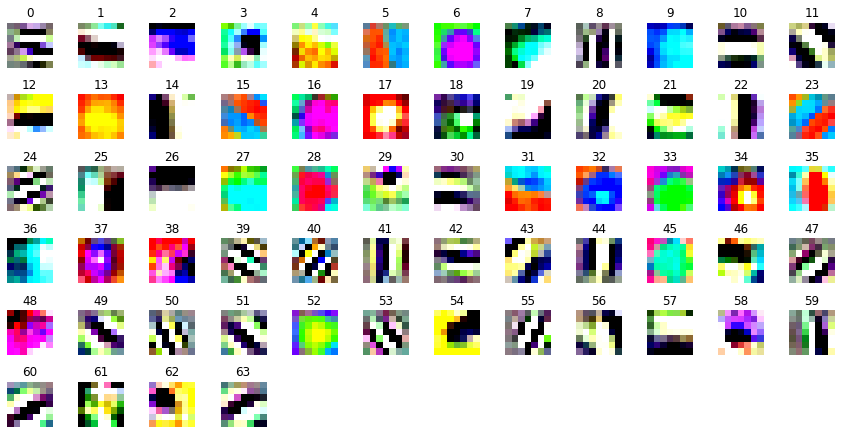

In [ ]:

# #extracting the model features at the particular layer number
# layer = model.features[layer_num]

# #checking whether the layer is convolution layer or not 
# if isinstance(layer, nn.Conv2d):
  #getting the weight tensor data
weight_tensor = model_ft.conv1.weight.data

if False:
  if collated:
    plot_filters_single_channel_big(weight_tensor)
  else:
    plot_filters_single_channel(weight_tensor)
    
else:
  if weight_tensor.shape[1] == 3:
    plot_filters_multi_channel(weight_tensor)
  else:
    print("Can only plot weights with three channels with single channel = False")
      
# else:
#   print("Can only visualize layers which are convolutional")

In [ ]:
torch.save(model_ft.state_dict(), "model_resnet.pt")